In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import kagglehub
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

100%|██████████| 15.2M/15.2M [00:00<00:00, 188MB/s]

Extracting files...


In [4]:
import os
print("Files in dataset:", os.listdir(path))

Files in dataset: ['mnist_test.csv', 'mnist_train.csv']


In [6]:
data = pd.read_csv(f"{path}/mnist_train.csv")

In [7]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

In [9]:
print(m,n)

60000 785


In [13]:
train_data=data[0:int(0.8*m),:]
val_data=data[int(0.8*m):m,:]

X_train=train_data[:,1:].T
X_train=X_train/255.0
Y_train=train_data[:,0]


X_val=val_data[:,1:].T
X_val=X_val/255.0
Y_val=val_data[:,0]

In [12]:
print(X_val.shape)
print(Y_val.shape)
print(X_train.shape)
print(Y_train.shape)

(784, 12000)
(12000,)
(784, 48000)
(48000,)


In [18]:
def initialize_parameters():
  W1 = np.random.rand(10, 784) - 0.5
  B1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  B2 = np.random.rand(10, 1) - 0.5
  return W1, B1, W2, B2

def ReLU(X):
  return np.maximum(X, 0)

def softmax_calculator(Z):
  return np.exp(Z) / sum(np.exp(Z))

def forward_propagation(W1, B1, W2, B2, X):
  Z1 = W1.dot(X) + B1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + B2
  A2 = softmax_calculator(Z2)
  return Z1, A1, Z2, A2

def one_hot_converter(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  return one_hot_Y.T

def backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y):
  one_hot_Y = one_hot_converter(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  dB2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
  dW1 = 1 / m * dZ1.dot(X.T)
  dB1 = 1 / m * np.sum(dZ1)
  return dW1, dB1, dW2, dB2

def update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, learning_rate):
  W1 = W1 - learning_rate * dW1
  B1 = B1 - learning_rate * dB1
  W2 = W2 - learning_rate * dW2
  B2 = B2 - learning_rate * dB2
  return W1, B1, W2, B2

def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
  W1, B1, W2, B2 = initialize_parameters()

  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_propagation(W1, B1, W2, B2, X)
    dW1, dB1, dW2, dB2 = backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y)
    W1, B1, W2, B2 = update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)

    if (i%20)==0:
      print("Iteration number: ", i)
      print("Accuracy = ", get_accuracy(get_predictions(A2), Y))
  return W1, B1, W2, B2

In [20]:
W1,B1,W2,B2=gradient_descent(X_train,Y_train,0.1,1000)

Iteration number:  0
Accuracy =  0.1249375
Iteration number:  20
Accuracy =  0.29564583333333333
Iteration number:  40
Accuracy =  0.434875
Iteration number:  60
Accuracy =  0.5142916666666667
Iteration number:  80
Accuracy =  0.5700833333333334
Iteration number:  100
Accuracy =  0.613375
Iteration number:  120
Accuracy =  0.6481458333333333
Iteration number:  140
Accuracy =  0.67675
Iteration number:  160
Accuracy =  0.6998125
Iteration number:  180
Accuracy =  0.7173541666666666
Iteration number:  200
Accuracy =  0.7341458333333334
Iteration number:  220
Accuracy =  0.7474583333333333
Iteration number:  240
Accuracy =  0.759125
Iteration number:  260
Accuracy =  0.7692708333333333
Iteration number:  280
Accuracy =  0.7779791666666667
Iteration number:  300
Accuracy =  0.7852916666666667
Iteration number:  320
Accuracy =  0.7926875
Iteration number:  340
Accuracy =  0.798625
Iteration number:  360
Accuracy =  0.8041458333333333
Iteration number:  380
Accuracy =  0.8092916666666666
Ite

Predicted label:  [0]
Actual label:  0


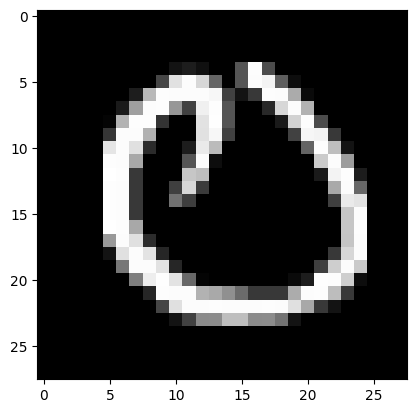

In [22]:
val_index = 100
Z1val, A1val, Z2val, A2val = forward_propagation(W1, B1, W2, B2, X_val[:, val_index, None])
print("Predicted label: ", get_predictions(A2val))
print("Actual label: ", Y_val[val_index])

image_array = X_val[:,val_index].reshape(28,28)
plt.imshow(image_array, cmap='gray')
plt.show()

In [23]:
Z1val, A1val, Z2val, A2val = forward_propagation(W1, B1, W2, B2, X_val)
val_acc = get_accuracy(get_predictions(A2val), Y_val)
print("Validation accuracy = ", val_acc)

Validation accuracy =  0.8680833333333333
